### PCA 的降噪处理
在有的时候可能各方面的其他方面的因素使得我们的数据会产生噪音，比如设备传输过程中数据部分的变化，这也就造成了 MNIST 数据在降维之后反而准确率更高了

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#创建一个带有噪音的数据
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

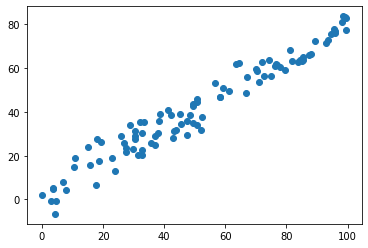

In [4]:
#绘制出来的图形在噪音的干扰直线线性关系变得不明显
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
# 先将数据降维，然后将降维后的数据进行还原，造成某些数据丢失
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

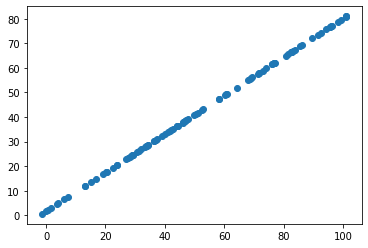

In [7]:
# 在还原数据的时候反而线性关系更加明显了，实现了降噪的效果
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

### 手写体识别的例子 

In [8]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
# 为数据集添加噪音,相当于给噪音矩阵加一个和 X一样大的矩阵
noisy_digits = X + np.random.normal(0,4,size = (X.shape))
noisy_digits.shape

(1797, 64)

In [16]:
#显示加过噪音的一部分的数据(注意第二个方括号没有, 也就是从 y==0的样本中再选 10个)
example_digits = noisy_digits[y==0,:][:10]  
#一共循环 10次
for num in range(1,10):
    #每一次都纵向拼10个单位
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])
example_digits.shape

(100, 64)

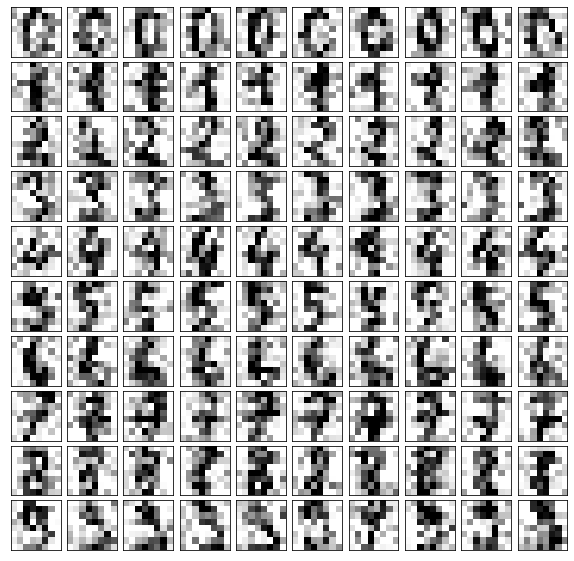

In [17]:
# pyplot  在一个图中绘制多个子图。根据上面的分析，这个图显示的效果是 01...9 十个为一行，共占 10行
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [19]:
# 对数据进行降噪，只保留 50% 的信息，
pca = PCA(0.5)
pca.fit(example_digits)
pca.n_components_

9

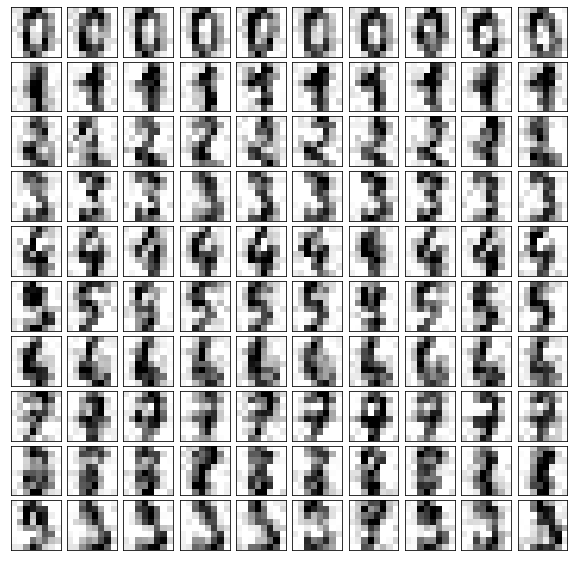

In [20]:
# 对数据进行降维处理
components = pca.transform(example_digits)
#将降维后的数据进行还原就完成了降噪处理
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)